## Manipulação de datas

In [1]:
#Importando a biblioteca
import pandas as pd

#Lendo a base de dados
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=16, engine="python")
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [2]:
#Deletando a coluna e a linha "Total"
dados.drop("Total", axis = 1, inplace=True)
dados.drop(19, inplace=True)

In [3]:
#Usando o método melt
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [4]:
#Criando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


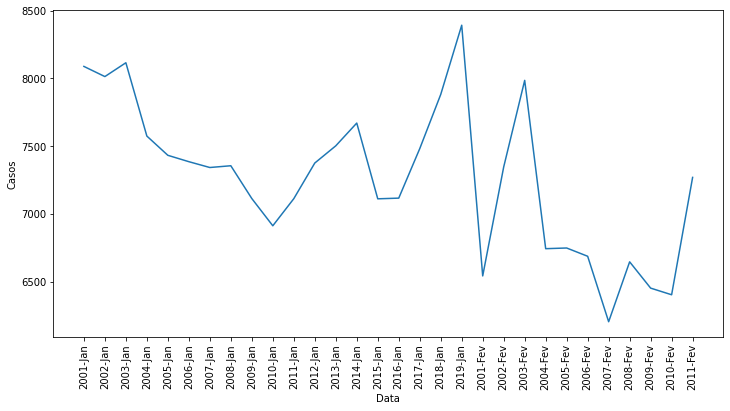

In [5]:
#Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

#Plotando a série temporal
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])

#Formatando o gráfico
plt.xticks(rotation = 90)
plt.show()

In [6]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


In [7]:
#Transformando a string em data
#pd.to_datetime(dados_st["Data"])

#to_datetime tem inglês como idioma padrão, a abreviação está em português

In [8]:
#Criando um dicionário dos meses
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_st["Mês"] = dados_st["Mês"].map(meses_port_ing)
dados_st.sample(5)

,Ano Diagnóstico,Mês,Casos,Data
67,2011,Apr,7558,2011-Abr
214,2006,Dec,6151,2006-Dez
165,2014,Sep,7505,2014-Set
15,2016,Jan,7116,2016-Jan
98,2004,Jun,7314,2004-Jun


In [9]:
#Atualizando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [10]:
#Transformando a string em data
dados_st["Data"] = pd.to_datetime(dados_st["Data"])
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [11]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [12]:
#Selecionando as colunas de interesse
dados_st = dados_st[["Data", "Casos"]]
dados_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


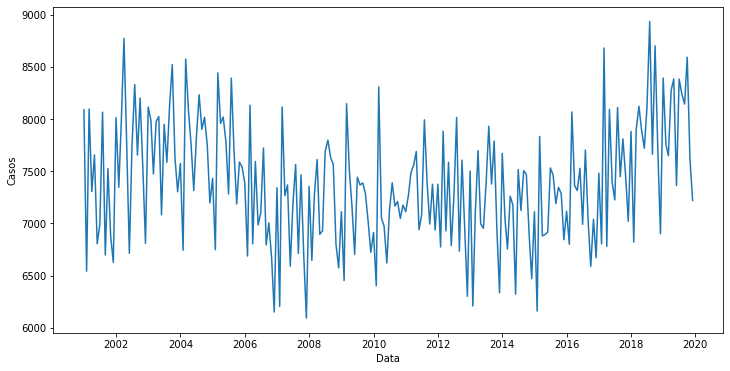

In [13]:
#Plotando o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st)

#Formatando o gráfico
plt.xticks(rotation = 0)
plt.show()

### Desafio 01: Realizar os mesmos processos de transformação da Série Temporal para a base de dados de Hanseníase


In [14]:
#Lendo a base de dados
url = "https://raw.githubusercontent.com/claricefiorese/bootcamp_alura_aulas/main/hanseniase_ano_mes_diagnostico.csv"

dados_h = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=10, engine="python")
dados_h.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,28,8,12,14,14,17,17,14,12,23,21,21,201
1,1975,-,1,-,-,-,-,-,-,-,-,-,1,2
2,1976,-,-,-,2,1,2,-,-,2,-,1,-,8
3,1977,2,-,-,1,-,-,-,-,-,1,1,-,5
4,1978,-,-,-,-,-,2,1,2,-,1,-,-,6


In [15]:
#Selecionando as linhas de interesse
dados_h = dados_h[27:]

In [16]:
#Deletando a coluna e a linha "Total"
dados_h.drop("Total", axis = 1, inplace=True)
dados_h.drop(46, inplace=True)

In [17]:
dados_h.reset_index(drop=True)

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209
5,2006,4448,4520,5168,3865,4488,3868,3937,4868,4012,4289,4206,3399
6,2007,3999,3747,4708,3740,4161,3621,3959,4482,3810,4456,3849,3234
7,2008,3712,3642,3781,4246,3635,3938,4498,4772,4472,4059,3716,3052
8,2009,3489,3875,4584,3625,3786,3562,3813,4070,3775,3598,3750,2950
9,2010,3199,3340,4254,3548,3969,3333,3370,3947,3522,3490,3605,2928


In [18]:
#Usando o método melt
dados_hanseniase = dados_h.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_hanseniase

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,4107
1,2002,Jan,3982
2,2003,Jan,4127
3,2004,Jan,4168
4,2005,Jan,4078
...,...,...,...
223,2015,Dez,2412
224,2016,Dez,2213
225,2017,Dez,2448
226,2018,Dez,2268


In [19]:
#Criando a coluna "Data"
dados_hanseniase["Data"] = dados_hanseniase[["Ano Diagnóstico", "Mês"]].agg("-".join, axis=1)

In [20]:
#Obtendo informações sobre o DataFrame
dados_hanseniase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    object
 3   Data             228 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


In [21]:
#Convertendo o número de casos para int
dados_hanseniase["Casos"] = dados_hanseniase["Casos"].astype("int64")

In [22]:
#Transformando a string em data
from datetime import date

#Criando um dicionário dos meses
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

dados_hanseniase["Data"] = dados_hanseniase["Data"].map(para_dia) #Mapear cada um dos valores do índice de acordo com a função "para_dia"
dados_hanseniase["Data"]

0      2001-01-01
1      2002-01-01
2      2003-01-01
3      2004-01-01
4      2005-01-01
          ...    
223    2015-12-01
224    2016-12-01
225    2017-12-01
226    2018-12-01
227    2019-12-01
Name: Data, Length: 228, dtype: object

In [23]:
#Selecionando as colunas de interesse
dados_hanseniase = dados_hanseniase[["Data", "Casos"]]

In [24]:
#Conferindo a transformação
dados_hanseniase["Data"][1]

datetime.date(2002, 1, 1)

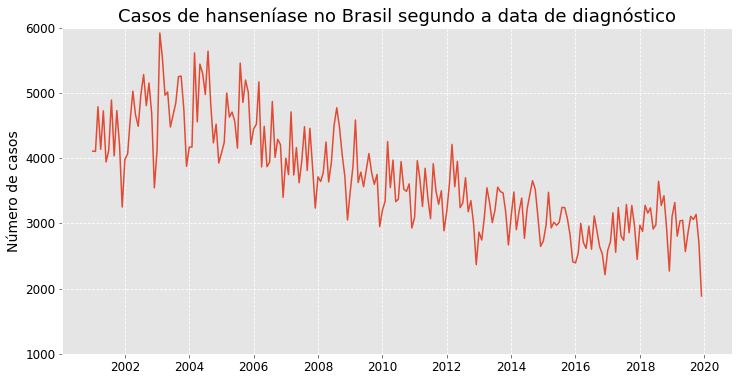

In [30]:
#Plotando o gráfico
plt.figure(figsize=(12,6))
with plt.style.context('ggplot'):
  sns.lineplot(data=dados_hanseniase, x="Data", y="Casos")

#Formatando o gráfico
plt.xlabel("", color = "k", size=14)
plt.ylabel("Número de casos", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(1000, 6000)
plt.grid(linestyle="--")
plt.title("Casos de hanseníase no Brasil segundo a data de diagnóstico", fontsize=18)

plt.show()

### Desafio 02: Deixar o gráfico da série temporal bonito

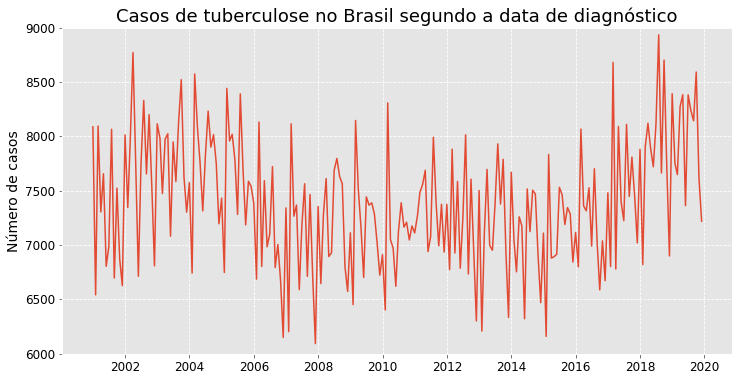

In [26]:
#Plotando o gráfico
plt.figure(figsize=(12,6))

with plt.style.context('ggplot'):
  sns.lineplot(x="Data", y="Casos", data=dados_st)

#Formatando o gráfico
plt.xlabel("", color = "k", size=14)
plt.ylabel("Número de casos", color = "k", size=14)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(6000, 9000)
plt.grid(linestyle="--")
plt.title("Casos de tuberculose no Brasil segundo a data de diagnóstico", fontsize=18)

plt.show()
